In [68]:
from typing import Tuple

import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [69]:
t5_results_path = "../out/t5_eval.csv"
gpt2_results_path = "../out/gpt2_eval.csv"

In [70]:
t5_res = pd.read_csv(t5_results_path)
gpt2_res = pd.read_csv(gpt2_results_path)

In [71]:
# add 'score' column and 'reasoning' column parsed from the 'gpt4_eval'
def extract_score_reasoning(gpt4_output_str: str) -> Tuple[str, str]:
    try:
        score = gpt4_output_str.split("Score: ")[1].split("\n")[0]
    except IndexError:
        score = "N/A"
        
    try:
        reasoning = gpt4_output_str.split("Reasoning: ")[1].split("\n")[0]
    except IndexError:
        reasoning = "N/A"
        
    return score, reasoning

t5_res["score"], t5_res["reasoning"] = zip(*tqdm(t5_res["gpt4_eval"].apply(extract_score_reasoning)))
gpt2_res["score"], gpt2_res["reasoning"] = zip(*tqdm(gpt2_res["gpt4_eval"].apply(extract_score_reasoning)))

# convert score column (x/10) to a numeric column (x)
t5_res["score"] = t5_res["score"].apply(lambda x: x.split("/")[0])
gpt2_res["score"] = gpt2_res["score"].apply(lambda x: x.split("/")[0])

100%|██████████| 1276/1276 [00:00<00:00, 1337648.56it/s]


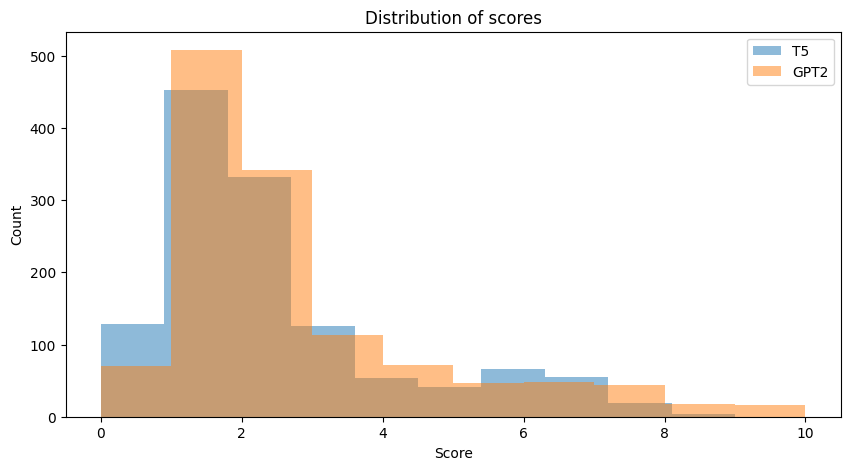

In [74]:
# plot the distribution of the scores from 0 to 10
plt.figure(figsize=(10, 5))
plt.hist(t5_res["score"].astype(float), bins=10, alpha=0.5, label="T5")
plt.hist(gpt2_res["score"].astype(float), bins=10, alpha=0.5, label="GPT2")
plt.title("Distribution of scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend()
plt.savefig("../out/score_distribution.png")
plt.show()

In [57]:
# print summary of the t5 and gpt2 scores (mean, std, min, max)
print("T5 score summary:")
print(t5_res["score"].astype(float).describe())
print()

print("GPT2 score summary:")
print(gpt2_res["score"].astype(float).describe())


T5 score summary:
count    1276.000000
mean        2.255094
std         1.961036
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: score, dtype: float64

GPT2 score summary:
count    1276.000000
mean        2.296238
std         1.942915
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: score, dtype: float64


In [58]:
# merge the two dataframes into one
merged_df = pd.merge(t5_res, gpt2_res, on="Meaning", suffixes=("_t5", "_gpt2"))
merged_df = merged_df[["Word", "Meaning", "Results_t5", "Results_gpt2", "score_t5", "score_gpt2"]]
merged_df = merged_df.rename(columns={"Results_t5": "t5_pred", "Results_gpt2": "gpt2_pred"})
merged_df

,Word,Meaning,t5_pred,gpt2_pred,score_t5,score_gpt2
0,bilip,to change or influence,to affect or affect,to cause something to be bad or bad,6,3
1,derst,to be of advantage or use,to cause something to be taken,to cause something to be faulty or faulty,2,1
2,ician,detailed and careful,able to be done with precision,able to find something,6,2
3,redis,conduct,a good attitude or attitude,the act of giving something to someone or some...,2,2
4,celint,to give up or give in,to change something or something,to change or change,2,1
...,...,...,...,...,...,...
1275,thwor,the size or length of something,the length of something that is a part of some...,the length of something,6,7
1276,enesis,to clarify something so it can be understood,to speak or speak something,to guide someone or something,3,2
1277,mulosy,the rate or speed of music or some other activity,a song that is played faster or faster,speed or speed,2,2
1278,rously,a large area where crops are grown,a cotton cotton slack that is used to make a h...,the condition of being in a state of slavery,2,0


In [60]:
# subset of 20 rows in the merged dataframe
subsample = merged_df.sample(20)

# add three new columns "vivian", "pun", "justin"
subsample["score_t5_vivian"] = ""
subsample["score_t5_pun"] = ""
subsample["score_t5_justin"] = ""
subsample["score_gpt2_vivian"] = ""
subsample["score_gpt2_pun"] = ""
subsample["score_gpt2_justin"] = ""

subsample.to_csv("../out/audit.csv", index=False)